In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler #standardize features
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report #accuracy score and detailed metrics report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [126]:
dataset= pd.read_csv ("C://Users//user//OneDrive//Documents//Custom Office Templates//WORK//german_credit_data_biased_training [MConverter.eu].csv")

In [127]:
dataset.head()

,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,...,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk
0,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
1,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,none,...,savings_insurance,37,stores,own,2,skilled,1,none,yes,No Risk
2,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,none,...,real_estate,28,none,own,2,skilled,1,yes,no,No Risk
3,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
4,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,none,...,unknown,57,none,own,2,skilled,1,none,yes,Risk


In [128]:
dataset.shape

(5000, 21)

In [129]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CheckingStatus            5000 non-null   object
 1   LoanDuration              5000 non-null   int64 
 2   CreditHistory             5000 non-null   object
 3   LoanPurpose               5000 non-null   object
 4   LoanAmount                5000 non-null   int64 
 5   ExistingSavings           5000 non-null   object
 6   EmploymentDuration        5000 non-null   object
 7   InstallmentPercent        5000 non-null   int64 
 8   Sex                       5000 non-null   object
 9   OthersOnLoan              5000 non-null   object
 10  CurrentResidenceDuration  5000 non-null   int64 
 11  OwnsProperty              5000 non-null   object
 12  Age                       5000 non-null   int64 
 13  InstallmentPlans          5000 non-null   object
 14  Housing                 

In [130]:
dataset.columns

Index(['CheckingStatus', 'LoanDuration', 'CreditHistory', 'LoanPurpose',
       'LoanAmount', 'ExistingSavings', 'EmploymentDuration',
       'InstallmentPercent', 'Sex', 'OthersOnLoan', 'CurrentResidenceDuration',
       'OwnsProperty', 'Age', 'InstallmentPlans', 'Housing',
       'ExistingCreditsCount', 'Job', 'Dependents', 'Telephone',
       'ForeignWorker', 'Risk'],
      dtype='object')

In [131]:
dataset.describe()

,LoanDuration,LoanAmount,InstallmentPercent,CurrentResidenceDuration,Age,ExistingCreditsCount,Dependents
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,21.393000,3480.145000,2.982400,2.854200,35.932400,1.465800,1.164600
std,11.162843,2488.232783,1.127096,1.115702,10.648536,0.565415,0.370856
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,13.000000,1326.750000,2.000000,2.000000,28.000000,1.000000,1.000000
50%,21.000000,3238.500000,3.000000,3.000000,36.000000,1.000000,1.000000
75%,29.000000,5355.000000,4.000000,4.000000,44.000000,2.000000,1.000000
max,64.000000,11676.000000,6.000000,6.000000,74.000000,4.000000,2.000000


In [132]:
dataset.tail()

,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,...,Job,Dependents,Telephone,ForeignWorker,Risk
4995,greater_200,27,credits_paid_to_date,furniture,4650,...,skilled,1,none,yes,No Risk
4996,0_to_200,11,prior_payments_delayed,furniture,250,...,unemployed,1,none,yes,No Risk
4997,no_checking,32,outstanding_credit,appliances,6536,...,unskilled,2,yes,yes,Risk
4998,0_to_200,38,outstanding_credit,other,1597,...,skilled,1,none,yes,Risk
4999,less_0,12,all_credits_paid_back,car_new,4152,...,skilled,1,none,yes,No Risk


In [133]:
dataset.sample(10) 

,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,...,Job,Dependents,Telephone,ForeignWorker,Risk
2233,0_to_200,17,credits_paid_to_date,car_used,1052,...,skilled,1,none,yes,No Risk
4373,no_checking,28,prior_payments_delayed,appliances,7654,...,management_self-employed,1,none,yes,No Risk
1438,no_checking,37,credits_paid_to_date,furniture,1975,...,unemployed,1,none,yes,Risk
3623,no_checking,42,outstanding_credit,vacation,6554,...,skilled,2,yes,yes,Risk
2462,0_to_200,4,all_credits_paid_back,car_new,250,...,skilled,1,none,yes,No Risk
1595,no_checking,33,prior_payments_delayed,appliances,5866,...,skilled,2,yes,yes,Risk
1082,0_to_200,19,all_credits_paid_back,car_new,3307,...,skilled,1,none,yes,No Risk
1151,0_to_200,19,credits_paid_to_date,retraining,3233,...,skilled,1,yes,yes,Risk
2668,no_checking,8,prior_payments_delayed,car_new,4882,...,skilled,2,none,yes,No Risk
2072,less_0,7,no_credits,car_new,250,...,skilled,1,none,yes,No Risk


In [134]:
dataset.isnull().sum()

CheckingStatus              0
LoanDuration                0
CreditHistory               0
LoanPurpose                 0
LoanAmount                  0
ExistingSavings             0
EmploymentDuration          0
InstallmentPercent          0
Sex                         0
OthersOnLoan                0
CurrentResidenceDuration    0
OwnsProperty                0
Age                         0
InstallmentPlans            0
Housing                     0
ExistingCreditsCount        0
Job                         0
Dependents                  0
Telephone                   0
ForeignWorker               0
Risk                        0
dtype: int64

In [135]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CheckingStatus            5000 non-null   object
 1   LoanDuration              5000 non-null   int64 
 2   CreditHistory             5000 non-null   object
 3   LoanPurpose               5000 non-null   object
 4   LoanAmount                5000 non-null   int64 
 5   ExistingSavings           5000 non-null   object
 6   EmploymentDuration        5000 non-null   object
 7   InstallmentPercent        5000 non-null   int64 
 8   Sex                       5000 non-null   object
 9   OthersOnLoan              5000 non-null   object
 10  CurrentResidenceDuration  5000 non-null   int64 
 11  OwnsProperty              5000 non-null   object
 12  Age                       5000 non-null   int64 
 13  InstallmentPlans          5000 non-null   object
 14  Housing                 

In [136]:
fields=['CheckingStatus', 'CreditHistory', 'LoanPurpose', 'ExistingSavings', 'EmploymentDuration', 'Sex', 'OthersOnLoan', 'OwnsProperty', 'InstallmentPlans', 'Housing', 'Job', 'Telephone', 'ForeignWorker', 'Risk']
for field in fields:
    print(f"Unique values in {field}:")
    print(dataset[field].unique(), "\n")  # Display unique values for each field

Unique values in CheckingStatus:
['0_to_200' 'less_0' 'no_checking' 'greater_200'] 

Unique values in CreditHistory:
['credits_paid_to_date' 'prior_payments_delayed' 'outstanding_credit'
 'all_credits_paid_back' 'no_credits'] 

Unique values in LoanPurpose:
['other' 'car_new' 'furniture' 'retraining' 'education' 'vacation'
 'appliances' 'car_used' 'repairs' 'radio_tv' 'business'] 

Unique values in ExistingSavings:
['100_to_500' 'less_100' '500_to_1000' 'unknown' 'greater_1000'] 

Unique values in EmploymentDuration:
['less_1' '1_to_4' 'greater_7' '4_to_7' 'unemployed'] 

Unique values in Sex:
['female' 'male'] 

Unique values in OthersOnLoan:
['none' 'co-applicant' 'guarantor'] 

Unique values in OwnsProperty:
['savings_insurance' 'real_estate' 'unknown' 'car_other'] 

Unique values in InstallmentPlans:
['none' 'stores' 'bank'] 

Unique values in Housing:
['own' 'free' 'rent'] 

Unique values in Job:
['skilled' 'management_self-employed' 'unskilled' 'unemployed'] 

Unique values in Te

In [137]:
for field in fields:
    print(f"Value counts for {field}:")
    print(dataset[field].value_counts(), "\n")  # Display value counts for each field

Value counts for CheckingStatus:
CheckingStatus
no_checking    1993
less_0         1398
0_to_200       1304
greater_200     305
Name: count, dtype: int64 

Value counts for CreditHistory:
CreditHistory
prior_payments_delayed    1686
credits_paid_to_date      1490
outstanding_credit         938
all_credits_paid_back      769
no_credits                 117
Name: count, dtype: int64 

Value counts for LoanPurpose:
LoanPurpose
car_new       945
furniture     853
car_used      808
radio_tv      755
appliances    561
repairs       283
vacation      205
education     167
retraining    164
business      146
other         113
Name: count, dtype: int64 

Value counts for ExistingSavings:
ExistingSavings
less_100        1856
100_to_500      1133
500_to_1000     1078
greater_1000     558
unknown          375
Name: count, dtype: int64 

Value counts for EmploymentDuration:
EmploymentDuration
1_to_4        1470
4_to_7        1400
greater_7      930
less_1         904
unemployed     296
Name: count, 

In [138]:
# Identify categorical and numerical features
categorical_columns = dataset.select_dtypes(include=['object']).columns.tolist()
numerical_columns = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [139]:
# Exclude the target variable 'Risk' from feature lists
categorical_columns.remove('Risk') if 'Risk' in categorical_columns else None
numerical_columns.remove('Risk') if 'Risk' in numerical_columns else None

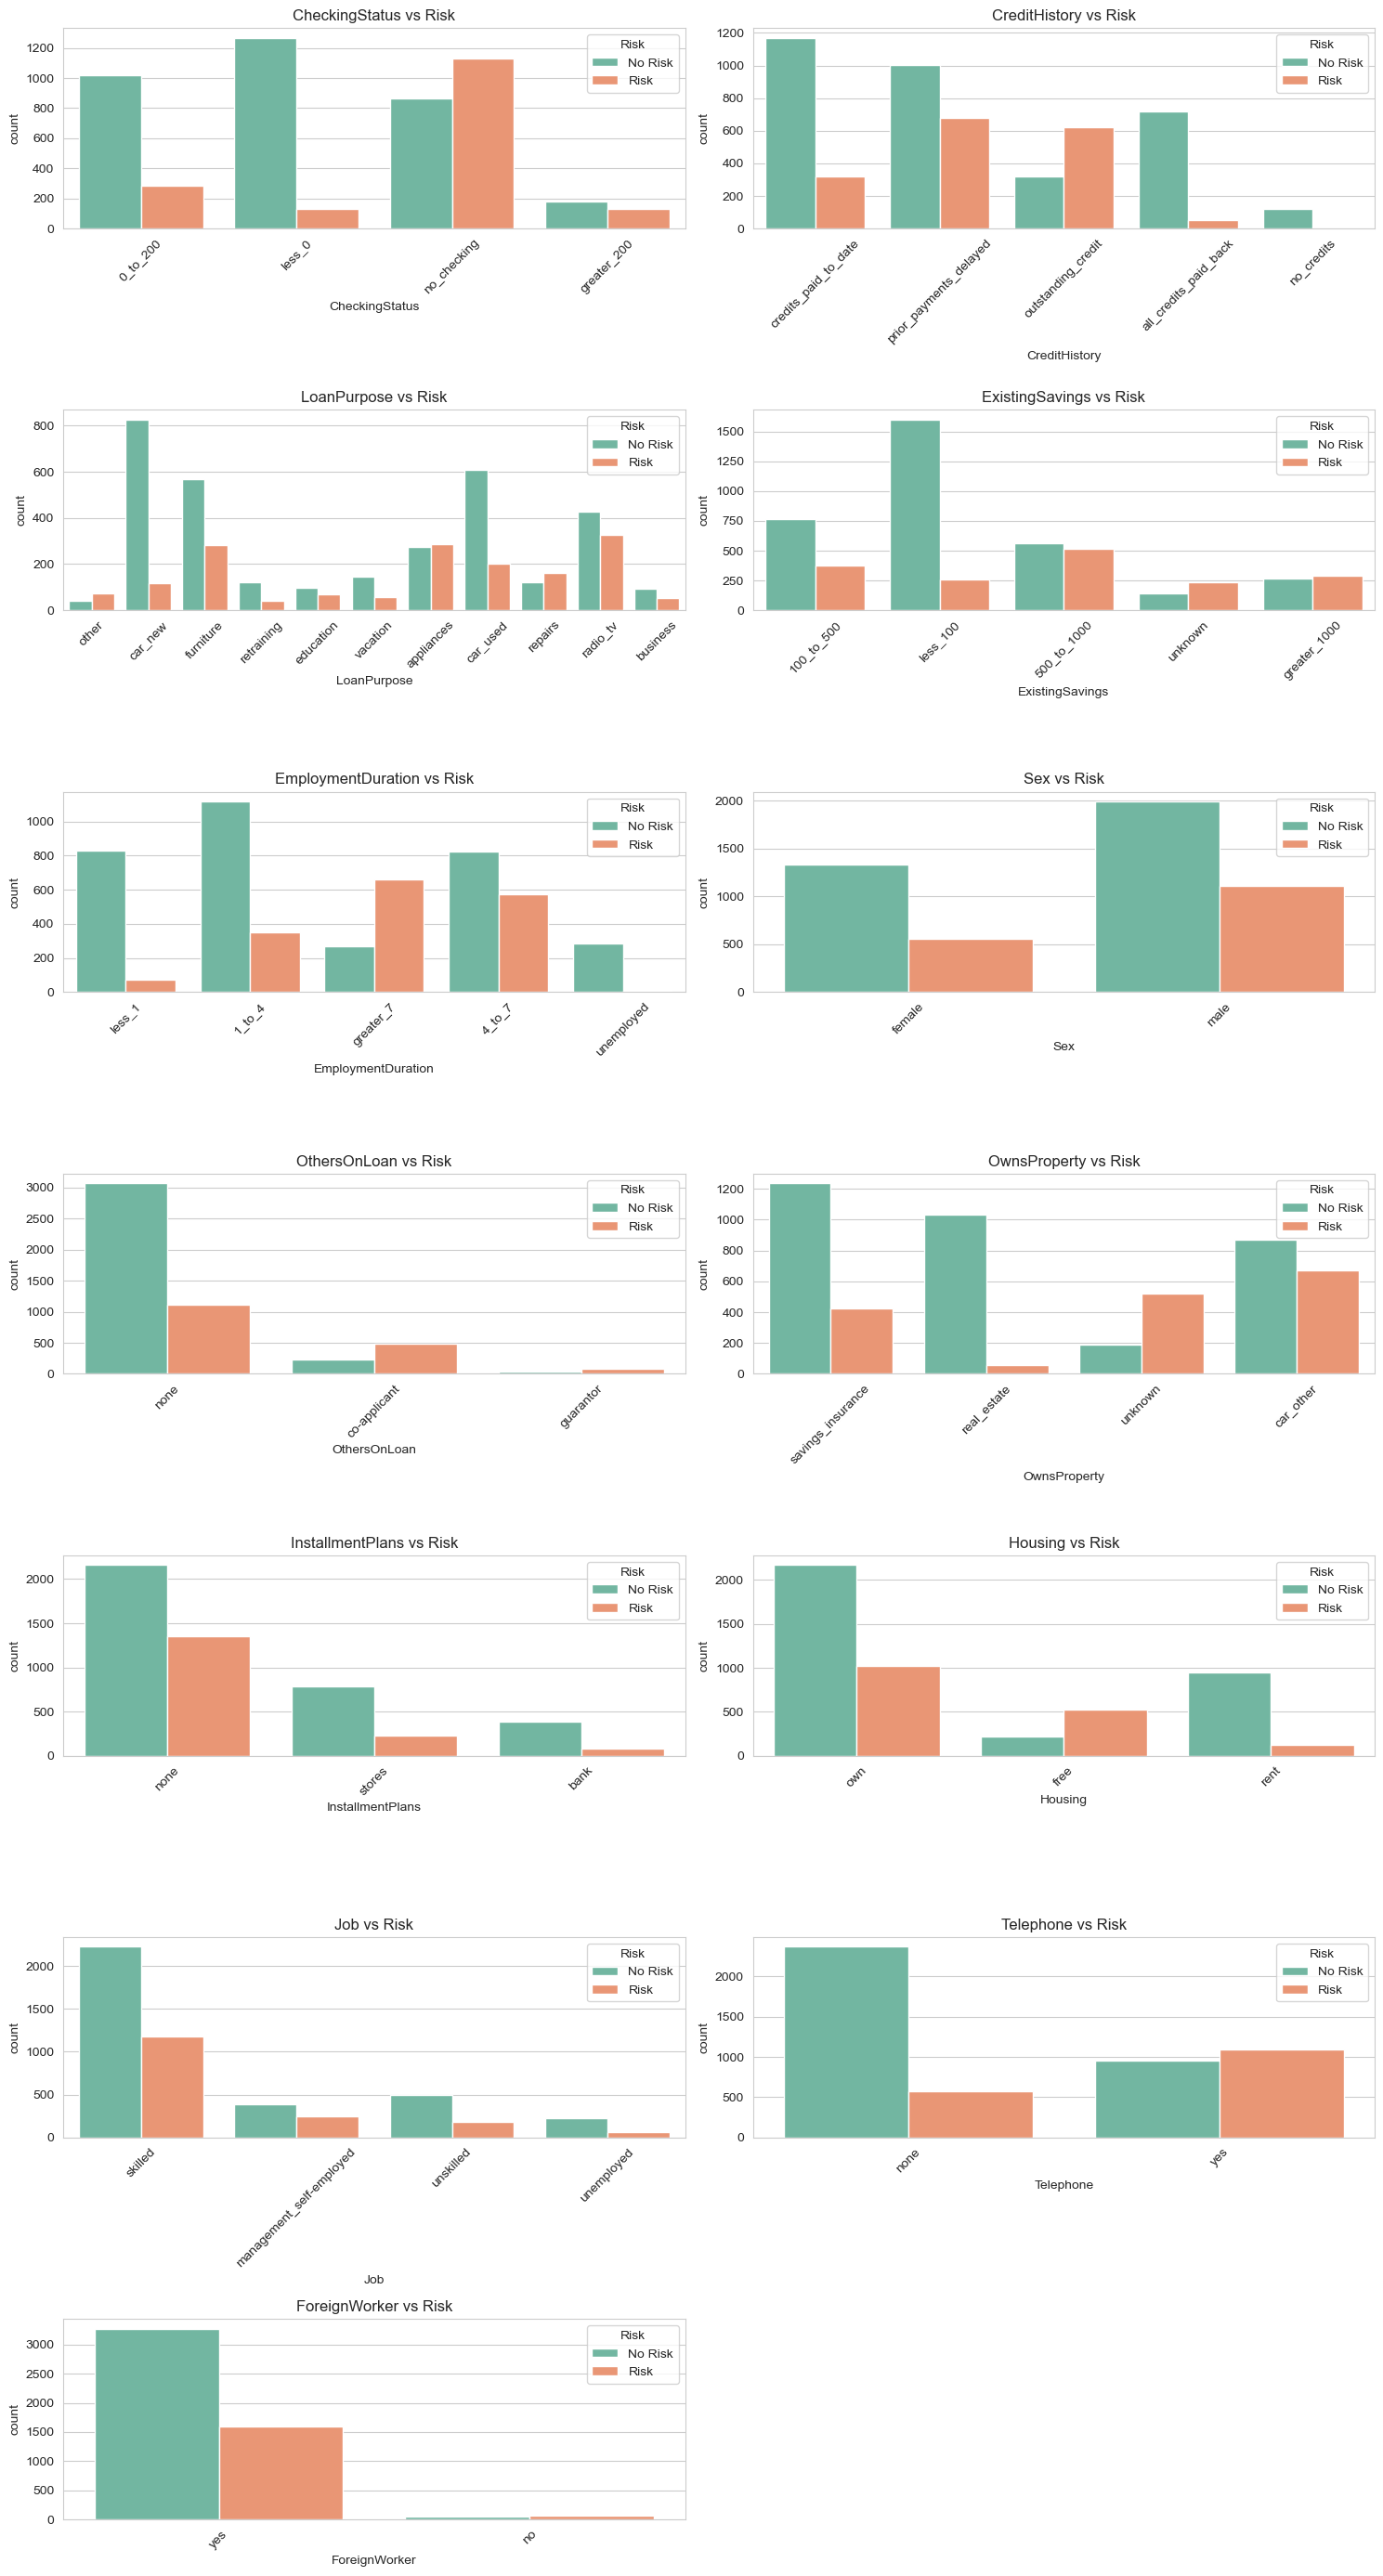

C:\Users\user\AppData\Local\Temp\ipykernel_10188\1403525858.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x="Risk", y=feature, palette="Set2")
C:\Users\user\AppData\Local\Temp\ipykernel_10188\1403525858.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x="Risk", y=feature, palette="Set2")
C:\Users\user\AppData\Local\Temp\ipykernel_10188\1403525858.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x="Risk", y=feature, palette="Set2")
C:\Users\user\AppData\Local\Temp\ipykernel_10188\140352

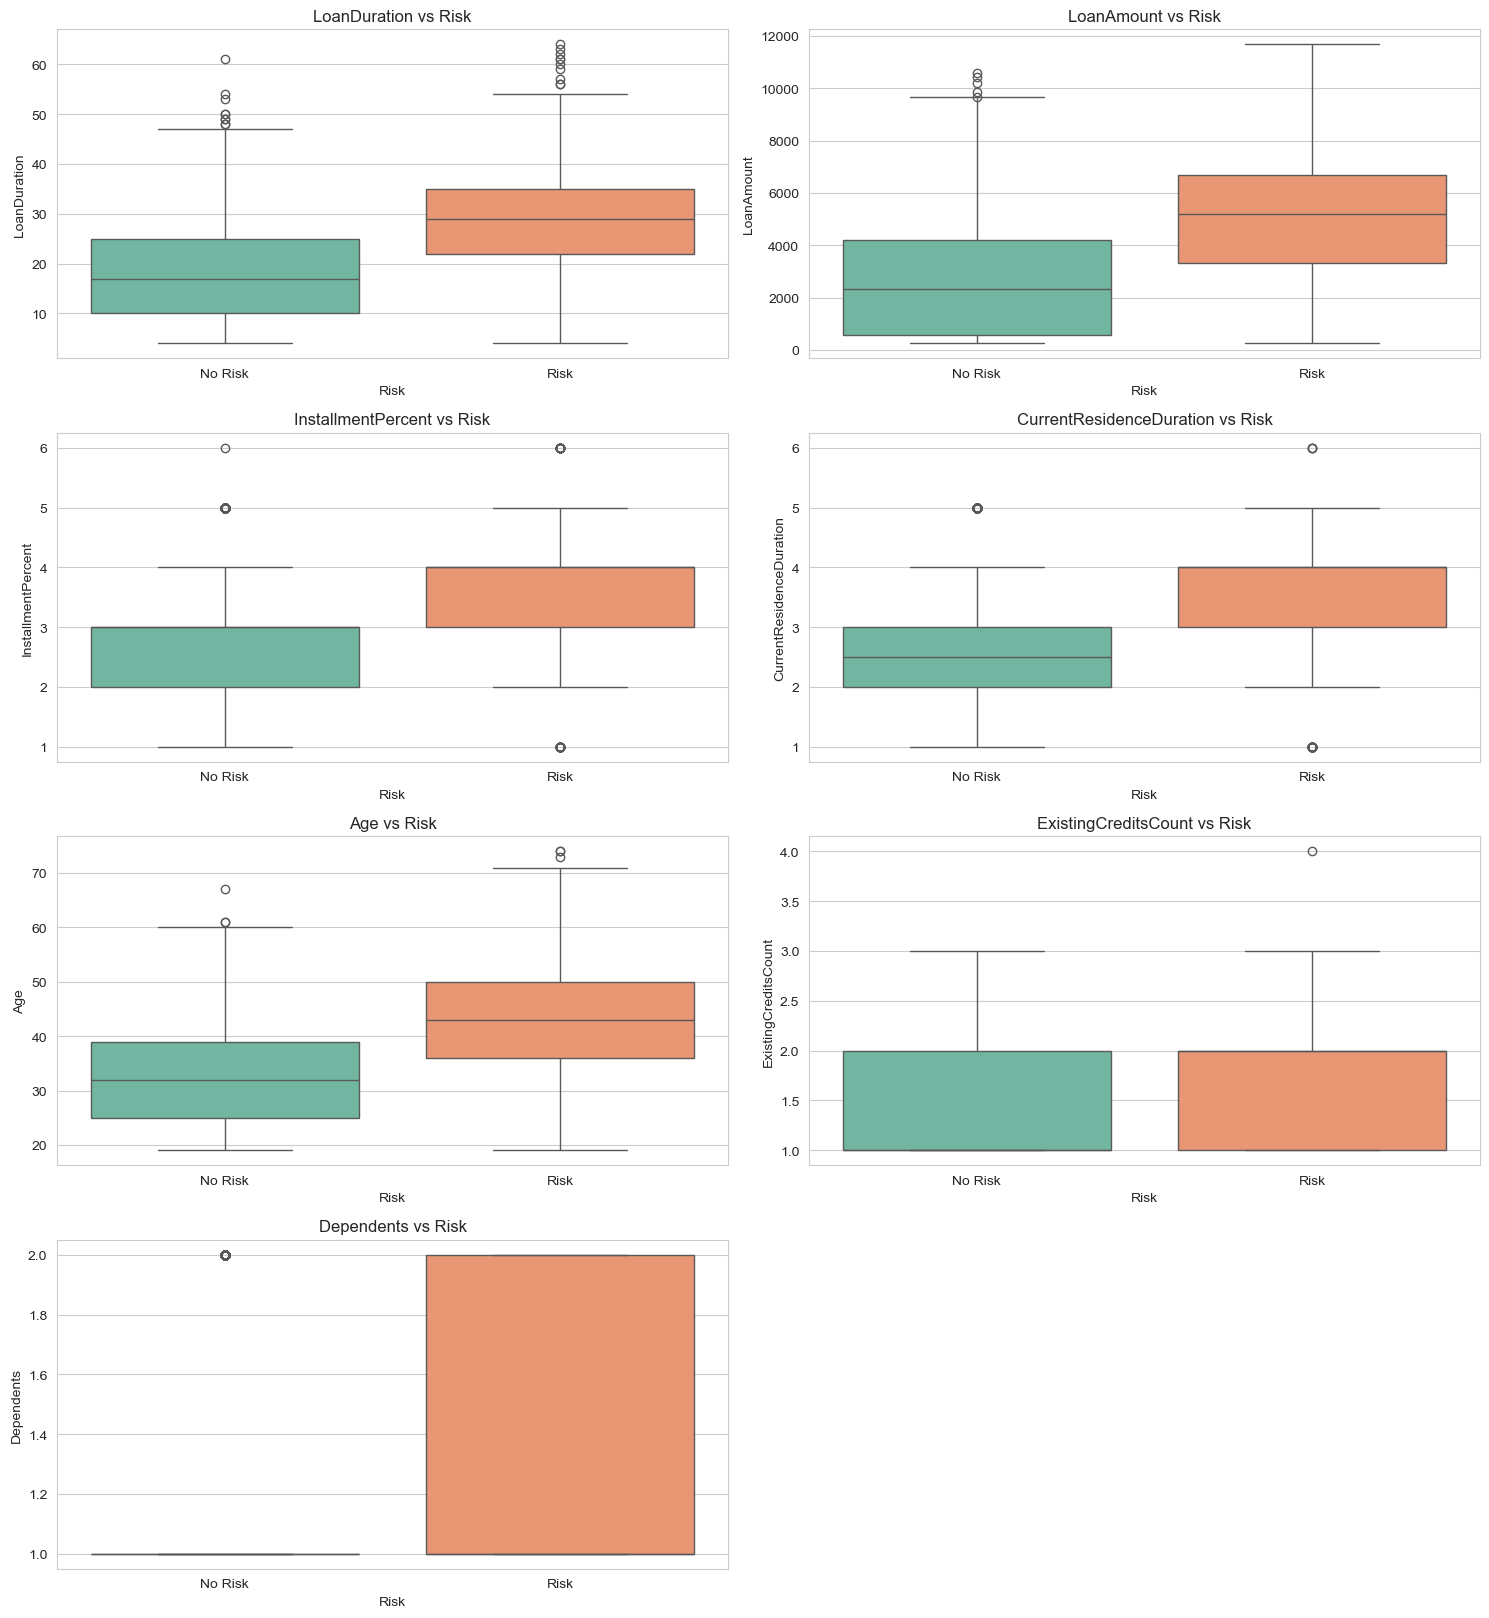

In [140]:
# Set visualization style
sns.set_style("whitegrid")

# Plot categorical features against Risk
plt.figure(figsize=(15, len(categorical_columns) * 4))
for i, feature in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 2, i)
    sns.countplot(data=dataset, x=feature, hue="Risk", palette="Set2")
    plt.xticks(rotation=45)
    plt.title(f"{feature} vs Risk")
plt.tight_layout()
plt.show()

# Plot numerical features against Risk using boxplots
plt.figure(figsize=(15, len(numerical_columns) * 4))
for i, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, i)
    sns.boxplot(data=dataset, x="Risk", y=feature, palette="Set2")
    plt.title(f"{feature} vs Risk")
plt.tight_layout()
plt.show()

In [141]:
#CORRELATION
from scipy.stats import chi2_contingency
# Display first few rows to check data structure
print(dataset[['CreditHistory', 'CheckingStatus']].head())

            CreditHistory CheckingStatus
0    credits_paid_to_date       0_to_200
1    credits_paid_to_date         less_0
2  prior_payments_delayed         less_0
3    credits_paid_to_date       0_to_200
4  prior_payments_delayed    no_checking


In [142]:
# Function to calculate Cramér’s V for categorical correlation
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Calculate correlation
correlation_value = cramers_v(dataset['CreditHistory'], dataset['CheckingStatus'])
print(f"Cramér’s V correlation between CreditHistory and CheckingStatus is: {correlation_value:.3f}")

Cramér’s V correlation between CreditHistory and CheckingStatus is: 0.324


In [143]:
# Drop 'Sex', 'ForeignWorker', and 'Telephone' fields if they exist
dataset.drop(['Sex', 'ForeignWorker', 'Telephone'], axis=1, inplace=True)

In [144]:
dataset.columns

Index(['CheckingStatus', 'LoanDuration', 'CreditHistory', 'LoanPurpose',
       'LoanAmount', 'ExistingSavings', 'EmploymentDuration',
       'InstallmentPercent', 'OthersOnLoan', 'CurrentResidenceDuration',
       'OwnsProperty', 'Age', 'InstallmentPlans', 'Housing',
       'ExistingCreditsCount', 'Job', 'Dependents', 'Risk'],
      dtype='object')

In [145]:
fields=['CheckingStatus', 'CreditHistory', 'LoanPurpose', 'ExistingSavings', 'EmploymentDuration', 'OthersOnLoan', 'OwnsProperty', 'InstallmentPlans', 'Housing', 'Job', 'Risk']
for field in fields:
    print(f"Unique values in {field}:")
    print(dataset[field].unique(), "\n")  # Display unique values for each field

Unique values in CheckingStatus:
['0_to_200' 'less_0' 'no_checking' 'greater_200'] 

Unique values in CreditHistory:
['credits_paid_to_date' 'prior_payments_delayed' 'outstanding_credit'
 'all_credits_paid_back' 'no_credits'] 

Unique values in LoanPurpose:
['other' 'car_new' 'furniture' 'retraining' 'education' 'vacation'
 'appliances' 'car_used' 'repairs' 'radio_tv' 'business'] 

Unique values in ExistingSavings:
['100_to_500' 'less_100' '500_to_1000' 'unknown' 'greater_1000'] 

Unique values in EmploymentDuration:
['less_1' '1_to_4' 'greater_7' '4_to_7' 'unemployed'] 

Unique values in OthersOnLoan:
['none' 'co-applicant' 'guarantor'] 

Unique values in OwnsProperty:
['savings_insurance' 'real_estate' 'unknown' 'car_other'] 

Unique values in InstallmentPlans:
['none' 'stores' 'bank'] 

Unique values in Housing:
['own' 'free' 'rent'] 

Unique values in Job:
['skilled' 'management_self-employed' 'unskilled' 'unemployed'] 

Unique values in Risk:
['No Risk' 'Risk'] 



In [146]:
fields=['CheckingStatus', 'CreditHistory', 'LoanPurpose', 'ExistingSavings', 'EmploymentDuration', 'OthersOnLoan', 'OwnsProperty', 'InstallmentPlans', 'Housing', 'Job', 'Risk']
for field in fields:
    print(f"Unique values in {field}:")
    print(dataset[field].unique(), "\n")  # Display unique values for each field

Unique values in CheckingStatus:
['0_to_200' 'less_0' 'no_checking' 'greater_200'] 

Unique values in CreditHistory:
['credits_paid_to_date' 'prior_payments_delayed' 'outstanding_credit'
 'all_credits_paid_back' 'no_credits'] 

Unique values in LoanPurpose:
['other' 'car_new' 'furniture' 'retraining' 'education' 'vacation'
 'appliances' 'car_used' 'repairs' 'radio_tv' 'business'] 

Unique values in ExistingSavings:
['100_to_500' 'less_100' '500_to_1000' 'unknown' 'greater_1000'] 

Unique values in EmploymentDuration:
['less_1' '1_to_4' 'greater_7' '4_to_7' 'unemployed'] 

Unique values in OthersOnLoan:
['none' 'co-applicant' 'guarantor'] 

Unique values in OwnsProperty:
['savings_insurance' 'real_estate' 'unknown' 'car_other'] 

Unique values in InstallmentPlans:
['none' 'stores' 'bank'] 

Unique values in Housing:
['own' 'free' 'rent'] 

Unique values in Job:
['skilled' 'management_self-employed' 'unskilled' 'unemployed'] 

Unique values in Risk:
['No Risk' 'Risk'] 



In [154]:
# Prepare the model (preprocessing)
y = dataset["Risk"] # our target variable
X = dataset.drop(["Risk"], axis=1) # our predictors
print (y, X)

0       0
1       0
2       0
3       0
4       1
       ..
4995    0
4996    0
4997    1
4998    1
4999    0
Name: Risk, Length: 5000, dtype: int64       CheckingStatus  LoanDuration  CreditHistory  LoanPurpose  LoanAmount  \
0                  0            31              0            0        1889   
1                  1            18              0            1         462   
2                  1            15              1            2         250   
3                  0            28              0            3        3693   
4                  2            28              1            4        6235   
...              ...           ...            ...          ...         ...   
4995               3            27              0            2        4650   
4996               0            11              1            2         250   
4997               2            32              2            6        6536   
4998               0            38              2            0        1

In [148]:

# Define mappings for categorical variables
CheckingStatus = {
    "0_to_200": 0, "less_0": 1, "no_checking": 2, "greater_200": 3
}

CreditHistory = {
    "credits_paid_to_date": 0, "prior_payments_delayed": 1, "outstanding_credit": 2,
    "all_credits_paid_back": 3, "no_credits": 4
}

LoanPurpose = {
    "other": 0, "car_new": 1, "furniture": 2, "retraining": 3, 
    "education": 4, "vacation": 5, "appliances": 6, "car_used": 7, 
    "repairs": 8, "radio_tv": 9, "business": 10
}

ExistingSavings = {
    "100_to_500": 0, "less_100": 1, "500_to_1000": 2, 
    "unknown": 3, "greater_1000": 4
}

EmploymentDuration = {
    "less_1": 0, "1_to_4": 1, "greater_7": 2, 
    "4_to_7": 3, "unemployed": 4
}

OthersOnLoan = {
    "none": 0, "co-applicant": 1, "guarantor": 2
}

OwnsProperty = {
    "savings_insurance": 0, "real_estate": 1, "unknown": 2, "car_other": 3
}

InstallmentPlans = {
    "none": 0, "stores": 1, "bank": 2
}

Housing = {
    "own": 0, "free": 1, "rent": 2
}

Job = {
    "skilled": 0, "management_self-employed": 1, 
    "unskilled": 2, "unemployed": 3
}

Risk = {
    "No Risk": 0, "Risk": 1
}

# Apply transformations to the dataset
dataset['CheckingStatus'] = dataset['CheckingStatus'].replace(CheckingStatus)
dataset['CreditHistory'] = dataset['CreditHistory'].replace(CreditHistory)
dataset['LoanPurpose'] = dataset['LoanPurpose'].replace(LoanPurpose)
dataset['ExistingSavings'] = dataset['ExistingSavings'].replace(ExistingSavings)
dataset['EmploymentDuration'] = dataset['EmploymentDuration'].replace(EmploymentDuration)
dataset['OthersOnLoan'] = dataset['OthersOnLoan'].replace(OthersOnLoan)
dataset['OwnsProperty'] = dataset['OwnsProperty'].replace(OwnsProperty)
dataset['InstallmentPlans'] = dataset['InstallmentPlans'].replace(InstallmentPlans)
dataset['Housing'] = dataset['Housing'].replace(Housing)
dataset['Job'] = dataset['Job'].replace(Job)
dataset['Risk'] = dataset ['Risk'].replace(Risk)

# Display transformed dataset sample
dataset.info()

C:\Users\user\AppData\Local\Temp\ipykernel_10188\1609672443.py:54: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['CheckingStatus'] = dataset['CheckingStatus'].replace(CheckingStatus)
C:\Users\user\AppData\Local\Temp\ipykernel_10188\1609672443.py:55: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['CreditHistory'] = dataset['CreditHistory'].replace(CreditHistory)
C:\Users\user\AppData\Local\Temp\ipykernel_10188\1609672443.py:56: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a fu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   CheckingStatus            5000 non-null   int64
 1   LoanDuration              5000 non-null   int64
 2   CreditHistory             5000 non-null   int64
 3   LoanPurpose               5000 non-null   int64
 4   LoanAmount                5000 non-null   int64
 5   ExistingSavings           5000 non-null   int64
 6   EmploymentDuration        5000 non-null   int64
 7   InstallmentPercent        5000 non-null   int64
 8   OthersOnLoan              5000 non-null   int64
 9   CurrentResidenceDuration  5000 non-null   int64
 10  OwnsProperty              5000 non-null   int64
 11  Age                       5000 non-null   int64
 12  InstallmentPlans          5000 non-null   int64
 13  Housing                   5000 non-null   int64
 14  ExistingCreditsCount      5000 non-null 

In [156]:
print(dataset.dtypes)  # Ensure all features are int64 or float64

CheckingStatus              int64
LoanDuration                int64
CreditHistory               int64
LoanPurpose                 int64
LoanAmount                  int64
ExistingSavings             int64
EmploymentDuration          int64
InstallmentPercent          int64
OthersOnLoan                int64
CurrentResidenceDuration    int64
OwnsProperty                int64
Age                         int64
InstallmentPlans            int64
Housing                     int64
ExistingCreditsCount        int64
Job                         int64
Dependents                  int64
Risk                        int64
dtype: object


In [158]:
for col in dataset.columns:
    print(f"{col}: {dataset[col].unique()}")  # Check all unique values

CheckingStatus: [0 1 2 3]
LoanDuration: [31 18 15 28 32  9 16 11 35  5 27 29  4 33 39 13 34 23 10 25 20 26 21  7
 14 64  6 19 17 38  8 30 22 37 12 36 50 41 24 43 40 48 46 44 42 45 53 61
 51 63 47 54 49 60 59 56 62 57 52]
CreditHistory: [0 1 2 3 4]
LoanPurpose: [ 0  1  2  3  4  5  6  7  8  9 10]
LoanAmount: [1889  462  250 ... 6536 1597 4152]
ExistingSavings: [0 1 2 3 4]
EmploymentDuration: [0 1 2 3 4]
InstallmentPercent: [3 2 6 5 4 1]
OthersOnLoan: [0 1 2]
CurrentResidenceDuration: [3 2 5 4 1 6]
OwnsProperty: [0 1 2 3]
Age: [32 37 28 57 41 36 22 49 19 34 40 44 52 35 26 27 24 33 51 38 46 31 39 29
 45 25 59 55 42 54 20 50 30 47 53 43 48 23 56 21 60 70 61 62 58 65 66 74
 63 71 67 73 64]
InstallmentPlans: [0 1 2]
Housing: [0 1 2]
ExistingCreditsCount: [1 2 3 4]
Job: [0 1 2 3]
Dependents: [1 2]
Risk: [0 1]


In [160]:
print(dataset.isnull().sum())  # Check for missing values

# Fill missing values with 0 or median (choose based on dataset)
dataset.fillna(0, inplace=True)  # Replace NaNs with 0
# OR
dataset.fillna(dataset.median(), inplace=True)  # Replace NaNs with column median

CheckingStatus              0
LoanDuration                0
CreditHistory               0
LoanPurpose                 0
LoanAmount                  0
ExistingSavings             0
EmploymentDuration          0
InstallmentPercent          0
OthersOnLoan                0
CurrentResidenceDuration    0
OwnsProperty                0
Age                         0
InstallmentPlans            0
Housing                     0
ExistingCreditsCount        0
Job                         0
Dependents                  0
Risk                        0
dtype: int64


In [162]:
dataset = dataset.astype(float)  # Convert entire dataset to float
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CheckingStatus            5000 non-null   float64
 1   LoanDuration              5000 non-null   float64
 2   CreditHistory             5000 non-null   float64
 3   LoanPurpose               5000 non-null   float64
 4   LoanAmount                5000 non-null   float64
 5   ExistingSavings           5000 non-null   float64
 6   EmploymentDuration        5000 non-null   float64
 7   InstallmentPercent        5000 non-null   float64
 8   OthersOnLoan              5000 non-null   float64
 9   CurrentResidenceDuration  5000 non-null   float64
 10  OwnsProperty              5000 non-null   float64
 11  Age                       5000 non-null   float64
 12  InstallmentPlans          5000 non-null   float64
 13  Housing                   5000 non-null   float64
 14  Existing

In [168]:
for col in dataset.columns:
    print(f"{col}: {dataset[col].unique()}")  # Check all unique values

CheckingStatus: [0. 1. 2. 3.]
LoanDuration: [31. 18. 15. 28. 32.  9. 16. 11. 35.  5. 27. 29.  4. 33. 39. 13. 34. 23.
 10. 25. 20. 26. 21.  7. 14. 64.  6. 19. 17. 38.  8. 30. 22. 37. 12. 36.
 50. 41. 24. 43. 40. 48. 46. 44. 42. 45. 53. 61. 51. 63. 47. 54. 49. 60.
 59. 56. 62. 57. 52.]
CreditHistory: [0. 1. 2. 3. 4.]
LoanPurpose: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
LoanAmount: [1889.  462.  250. ... 6536. 1597. 4152.]
ExistingSavings: [0. 1. 2. 3. 4.]
EmploymentDuration: [0. 1. 2. 3. 4.]
InstallmentPercent: [3. 2. 6. 5. 4. 1.]
OthersOnLoan: [0. 1. 2.]
CurrentResidenceDuration: [3. 2. 5. 4. 1. 6.]
OwnsProperty: [0. 1. 2. 3.]
Age: [32. 37. 28. 57. 41. 36. 22. 49. 19. 34. 40. 44. 52. 35. 26. 27. 24. 33.
 51. 38. 46. 31. 39. 29. 45. 25. 59. 55. 42. 54. 20. 50. 30. 47. 53. 43.
 48. 23. 56. 21. 60. 70. 61. 62. 58. 65. 66. 74. 63. 71. 67. 73. 64.]
InstallmentPlans: [0. 1. 2.]
Housing: [0. 1. 2.]
ExistingCreditsCount: [1. 2. 3. 4.]
Job: [0. 1. 2. 3.]
Dependents: [1. 2.]
Risk: [0. 1.]


In [172]:
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [186]:
# Train-test split
X = dataset.drop(columns=['Risk'])  # Features
y = dataset['Risk']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy Score
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Model Accuracy: 0.765
              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83       665
         1.0       0.69      0.53      0.60       335

    accuracy                           0.77      1000
   macro avg       0.74      0.71      0.72      1000
weighted avg       0.76      0.77      0.76      1000



In [188]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Accuracy Score
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Model Accuracy: 0.773
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84       665
         1.0       0.72      0.53      0.61       335

    accuracy                           0.77      1000
   macro avg       0.76      0.71      0.72      1000
weighted avg       0.77      0.77      0.76      1000



In [190]:
# Train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Accuracy Score
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Model Accuracy: 0.736
              precision    recall  f1-score   support

         0.0       0.77      0.85      0.81       665
         1.0       0.63      0.51      0.56       335

    accuracy                           0.74      1000
   macro avg       0.70      0.68      0.69      1000
weighted avg       0.73      0.74      0.73      1000



C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
